In [1]:
from urllib import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd
import json
import requests as r
import os
from ggplot import *
import logging
import numpy as np
import logging
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
data_path = '/Users/emilyrourke/Documents/Delta/Machine Learning'
loans_full = pd.read_csv(data_path+'/loans_full.csv', low_memory=False)
loans_details = pd.read_csv(data_path+'/loans_details.csv', low_memory=False)

In [5]:
## Look at the first 10 rows of both datasets
loans_full.head(10)
loans_details.head(10)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,description.languages,funded_amount,id,image.id,image.template_id,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,planned_expiration_date,posted_date,sector,status,tags,themes,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
0,0,Farming,0.0,False,1,NaN,['en'],0,1291548,2516002,1,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",NaN,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN
1,1,Furniture Making,0.0,False,1,NaN,['en'],0,1291532,2515992,1,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],NaN,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN
2,2,Home Energy,0.0,False,1,NaN,['en'],50,1291530,2515991,1,2,75,Kenya,KE,town,0.516667 35.283333,point,Eldoret,Rose,156.0,2017-06-08T00:30:03Z,2017-05-09T00:30:04Z,Personal Use,fundraising,"[{'name': '#Eco-friendly'}, {'name': '#Technol...","['Green', 'Earth Day Campaign']",to buy a solar lantern.,NaN,NaN,NaN,NaN
3,3,Used Clothing,0.0,False,1,NaN,['en'],0,1291525,2515986,1,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Jane,386.0,2017-06-08T00:20:04Z,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],NaN,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN
4,4,Farming,0.0,False,1,NaN,['en'],0,1291518,2515975,1,0,400,Kenya,KE,town,1 38,point,Nandi Hills,Alice,156.0,2017-06-08T00:20:03Z,2017-05-09T00:20:03Z,Agriculture,fundraising,[{'name': '#Woman Owned Biz'}],['Rural Exclusion'],"to buy farming inputs (fertilizers, pesticides...",NaN,NaN,NaN,NaN
5,5,Used Clothing,0.0,False,1,NaN,['en'],0,1291513,2515968,1,0,450,Kenya,KE,town,0.416667 34.25,point,Busia,Clare,386.0,2017-06-08T00:10:03Z,2017-05-09T00:10:04Z,Clothing,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Eco-...",NaN,to buy more bales of clothes to grow her busin...,NaN,NaN,NaN,NaN
6,6,Farming,25.0,False,1,NaN,['en'],125,1291516,2515972,1,5,150,Kenya,KE,town,1 38,point,Kerugoya,Mary,156.0,2017-06-08T00:10:03Z,2017-05-09T00:10:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",['Rural Exclusion'],to buy seeds so that she can begin horticultur...,NaN,NaN,NaN,NaN
7,7,Pigs,0.0,False,1,NaN,['en'],0,1291490,2515937,1,0,400,Kenya,KE,town,1 38,point,Limuru,James,386.0,2017-06-07T23:30:09Z,2017-05-08T23:30:09Z,Agriculture,fundraising,[{'name': '#Animals'}],NaN,"to buy pig feeds and logs to burn charcoal, so...",NaN,NaN,NaN,NaN
8,8,Farming,0.0,False,1,NaN,['en'],0,1291494,2511365,1,0,600,Kenya,KE,town,-0.283333 36.066667,point,Nakuru,Jacinta,133.0,2017-06-07T23:30:05Z,2017-05-08T23:30:05Z,Agriculture,fundraising,[],NaN,to purchase farm inputs.,NaN,NaN,NaN,NaN
9,9,Cereals,0.0,False,1,NaN,['en'],0,1291486,2515930,1,0,500,Kenya,KE,town,1 38,point,Bomet,Emily,156.0,2017-06-07T23:20:06Z,2017-05-08T23:20:06Z,Food,fundraising,[{'name': '#Woman Owned Biz'}],['Rural Exclusion'],to buy cereals to sell at her local market.,NaN,NaN,NaN,NaN


,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN
1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN
2,2,Home Energy,0.0,False,"[{'first_name': 'Rose', 'last_name': '', 'gend...",NaN,['en'],"Hello Kiva Community! <br /><br />Meet Rose, w...",NaN,NaN,NaN,50,NaN,1291530,2515991,1,0,0,2,75,Kenya,KE,town,0.516667 35.283333,point,Eldoret,Rose,156.0,[],2017-06-08T00:30:03Z,2017-05-09T00:30:04Z,Personal Use,fundraising,"[{'name': '#Eco-friendly'}, {'name': '#Technol...",6000.0,KES,2017-04-28T07:00:00Z,75,"[{'due_date': '2017-05-14T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...","['Green', 'Earth Day Campaign']",Julie Keaton,892591.0,to buy a solar lantern.,NaN,NaN,NaN,NaN
3,3,Used Clothing,0.0,False,"[{'first_name': 'Jane', 'last_name': '', 'gend...",NaN,['en'],"Jane was born in the 1980, and she is happily ...",NaN,NaN,NaN,0,NaN,1291525,2515986,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Jane,386.0,[],2017-06-08T00:20:04Z,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-08T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN
4,4,Farming,0.0,False,"[{'first_name': 'Alice', 'last_name': '', 'gen...",NaN,['en'],Alice (the woman pictured above in her small s...,NaN,NaN,NaN,0,NaN,1291518,2515975,1,0,0,0,400,Kenya,KE,town,1 38,point,Nandi Hills,Alice,156.0,[],2017-06-08T00:20:03Z,2017-05-09T00:20:03Z,Agriculture,fundraising,[{'name': '#Woman Owned Biz'}],40000.0,KES,2017-05-27T07:00:00Z,400,"[{'due_date': '2017-05-27T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,13,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",['Rural Exclusion'],NaN,NaN,"to buy farming inputs (fertilizers, pesticides...",NaN,NaN,NaN,NaN
5,5,Used Clothing,0.0,F

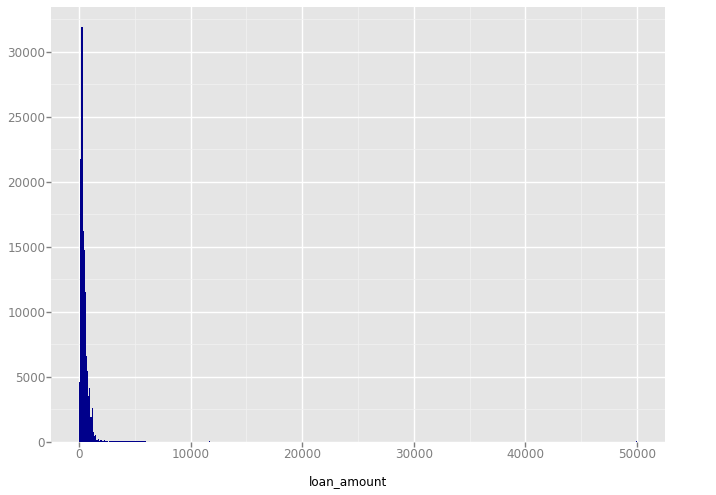

<ggplot: (308764085)>

In [6]:
ggplot(loans_details, aes(x='loan_amount')) + \
    geom_histogram(binwidth = 100, fill="darkblue")

## Clearly a long tail -- let's try zooming in to <$5000

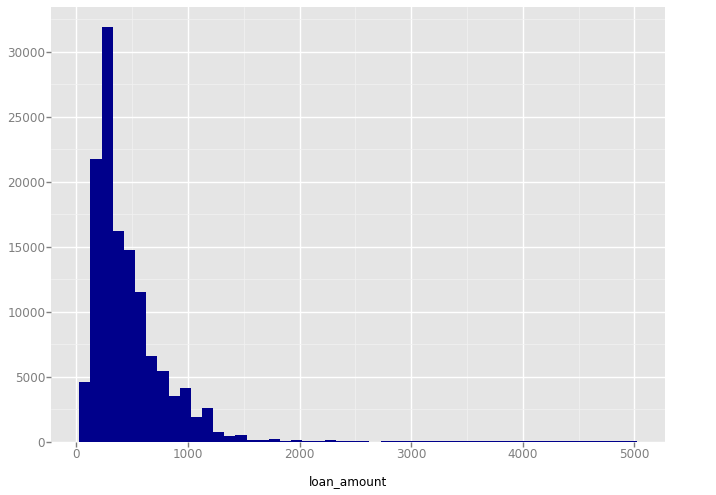

<ggplot: (292816429)>

In [7]:
ggplot(loans_details.query("loan_amount < 5000"), aes(x='loan_amount')) + \
    geom_histogram(binwidth = 100, fill="darkblue")

In [8]:
## What are the different Repayment value options?

loans_details['terms.repayment_interval'].unique()

array(['Monthly', nan, 'Irregularly', 'At end of term'], dtype=object)

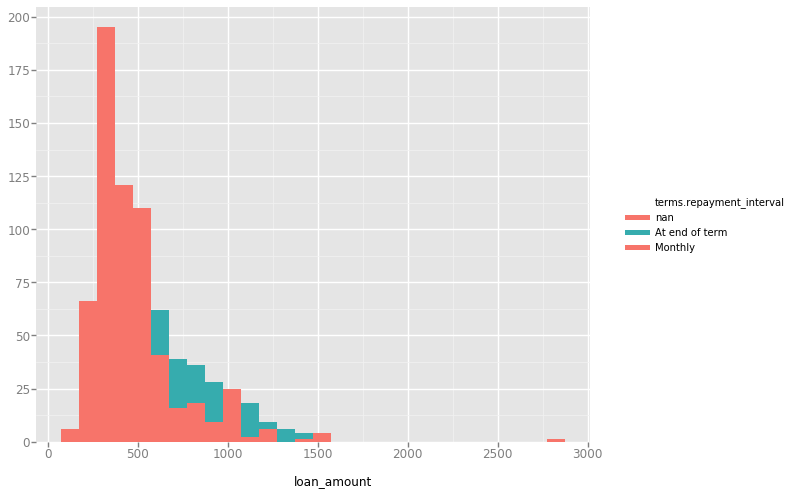

<ggplot: (309252001)>

In [68]:
## What does the distribution of loan amounts look like by repayment interval?
ggplot(loans_details.query("loan_amount < 5000"), aes(x='loan_amount', fill = 'terms.repayment_interval')) + \
    geom_histogram(binwidth = 100)


array(['Agriculture', 'Manufacturing', 'Personal Use', 'Clothing', 'Food',
       'Education', 'Transportation', 'Housing', 'Services', 'Retail',
       'Wholesale', 'Health', 'Arts', 'Construction', 'Entertainment'], dtype=object)

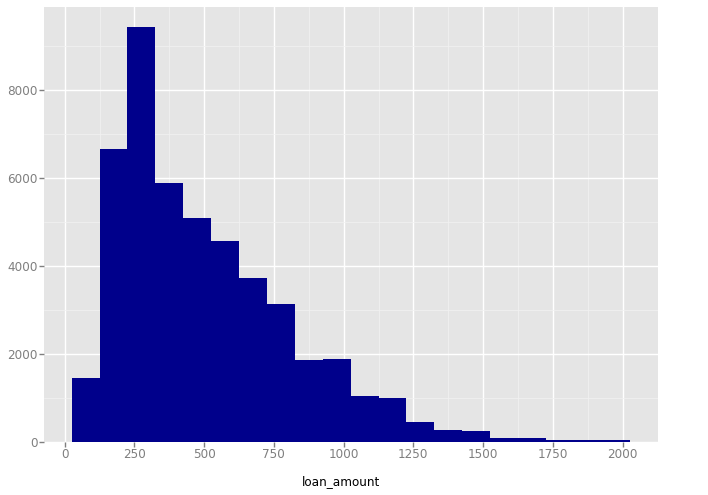

<ggplot: (298936353)>

In [9]:
## What are the different sectors for which Kiva lends?

loans_full.sector.unique()
loans_ag_food_const = loans_full[loans_full['sector']=='Agriculture']

## What does the distribution of loans look like just for Agriculture?

ggplot(loans_ag_food_const.query("loan_amount<2000"), aes(x='loan_amount')) + \
    geom_histogram(binwidth = 100, fill="darkblue")

In [10]:
## Let's write a loop to quickly slice the data by any variable and see the corresponding loan histogram

def loop_hists(var):
    unique_vals = np.unique(loans_full[var])
    for s in unique_vals:
        print(s)
        df = loans_full.query("loan_amount < 2000")[loans_full[var]== s]
        plot = ggplot(df, aes(x='loan_amount')) + \
            geom_histogram(binwidth = 100, fill="darkblue")
        print(plot)

Agriculture


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


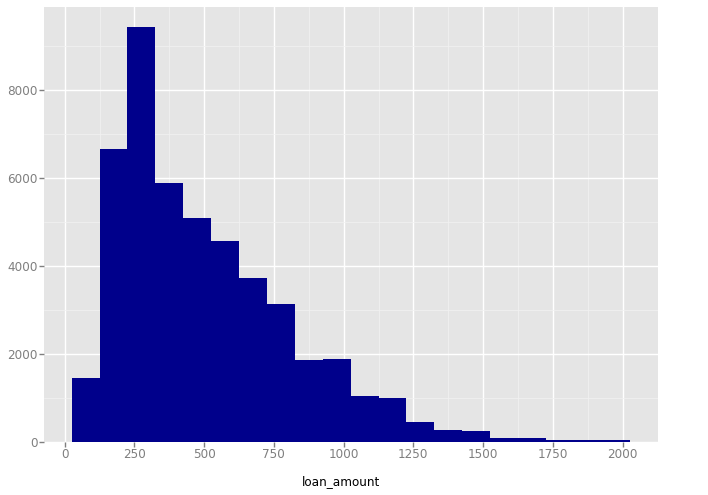

<ggplot: (298949265)>
Arts


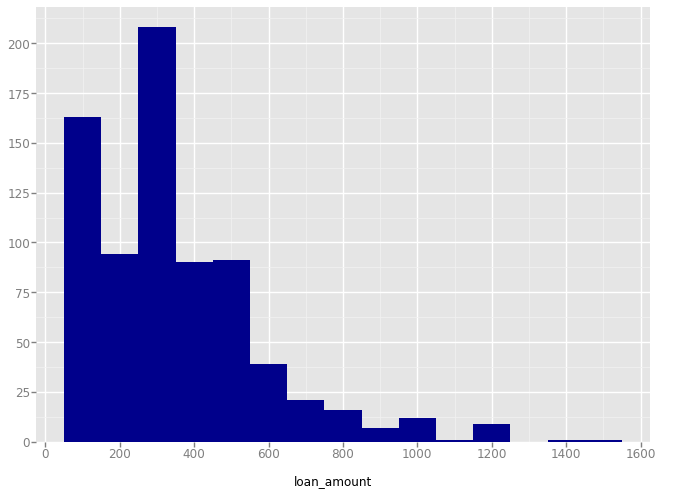

<ggplot: (298766269)>
Clothing


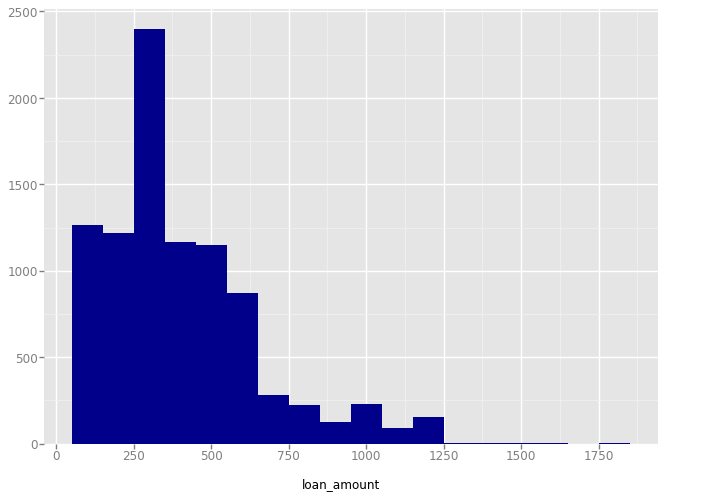

<ggplot: (306882909)>
Construction


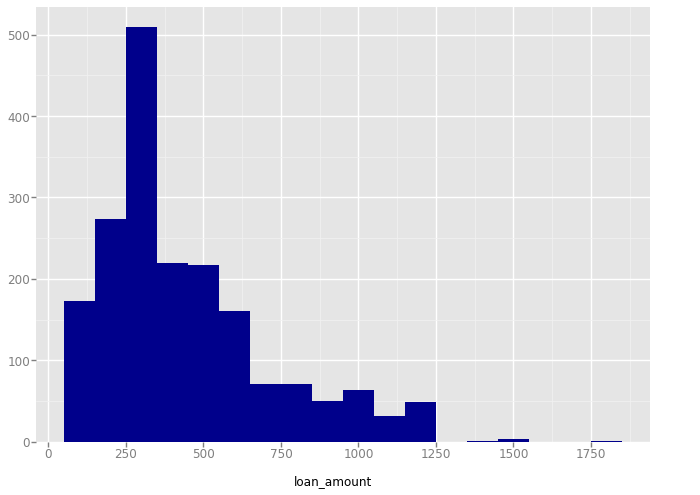

<ggplot: (306858189)>
Education


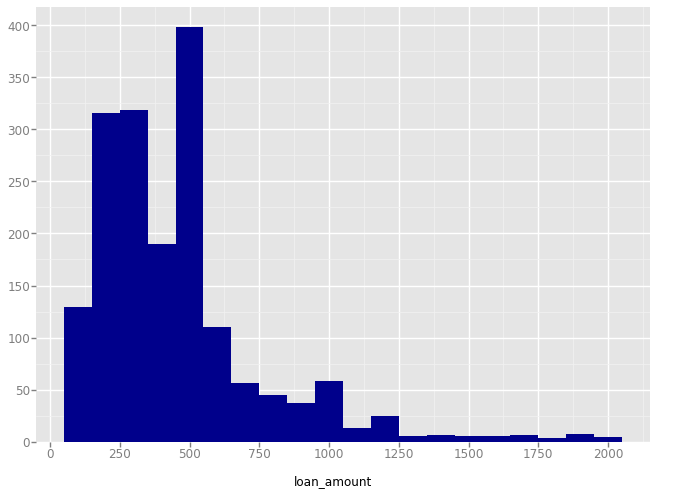

<ggplot: (306858233)>
Entertainment


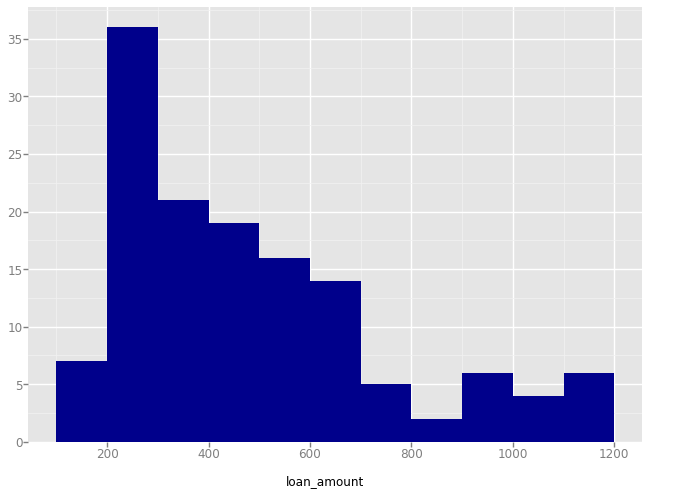

<ggplot: (308061473)>
Food


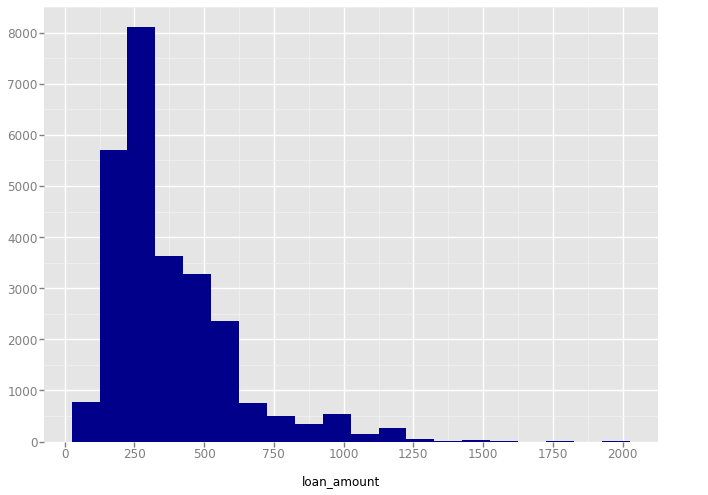

<ggplot: (308159225)>
Health


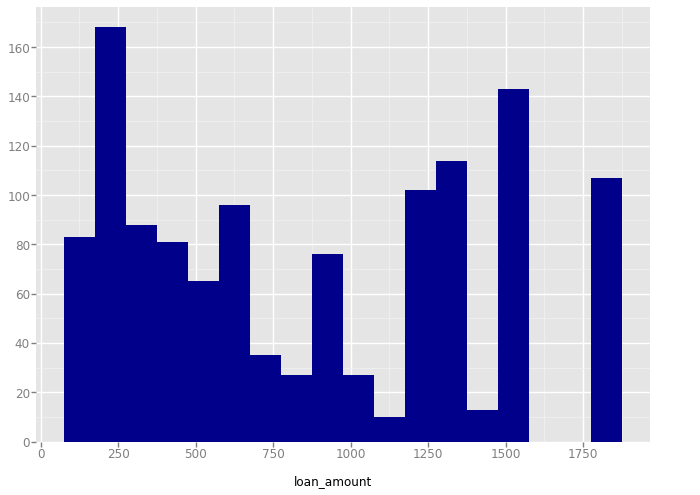

<ggplot: (307253089)>
Housing


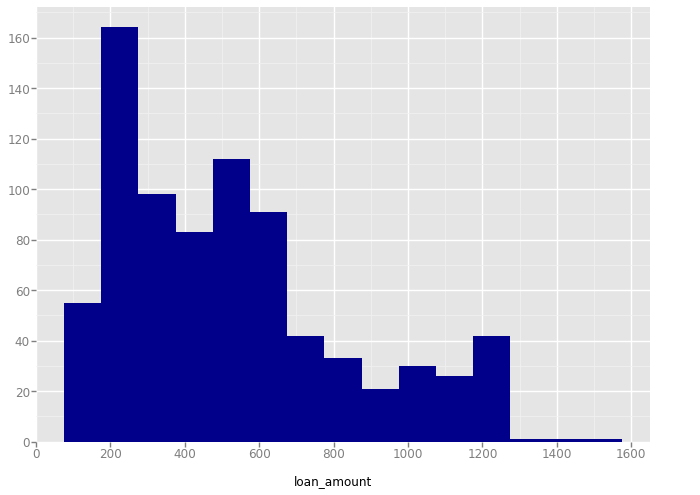

<ggplot: (307223417)>
Manufacturing


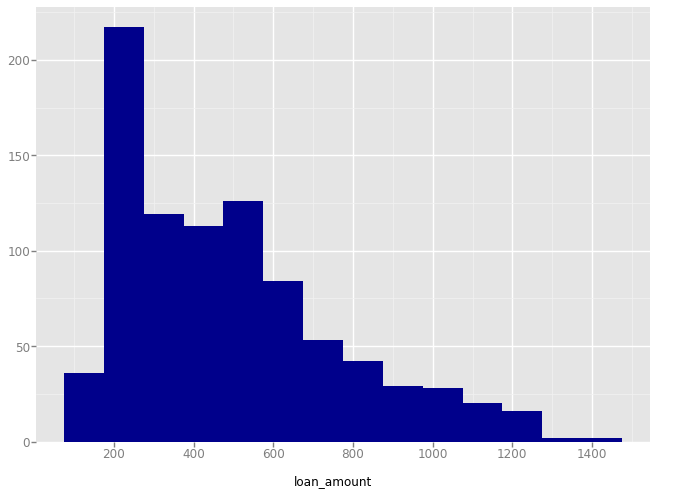

<ggplot: (308803101)>
Personal Use


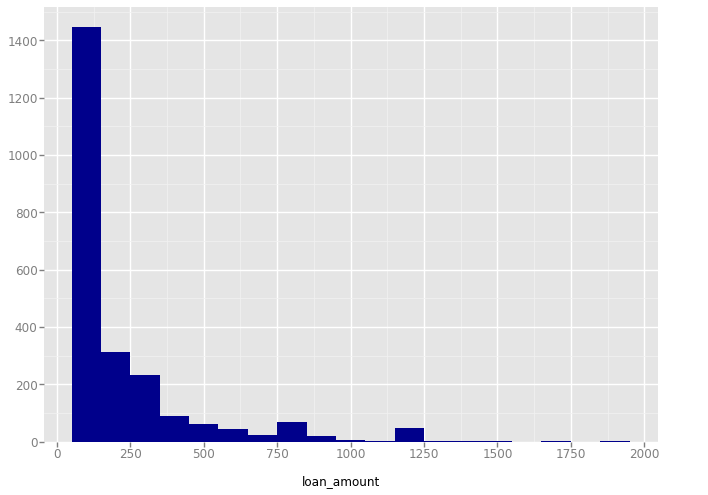

<ggplot: (290603477)>
Retail


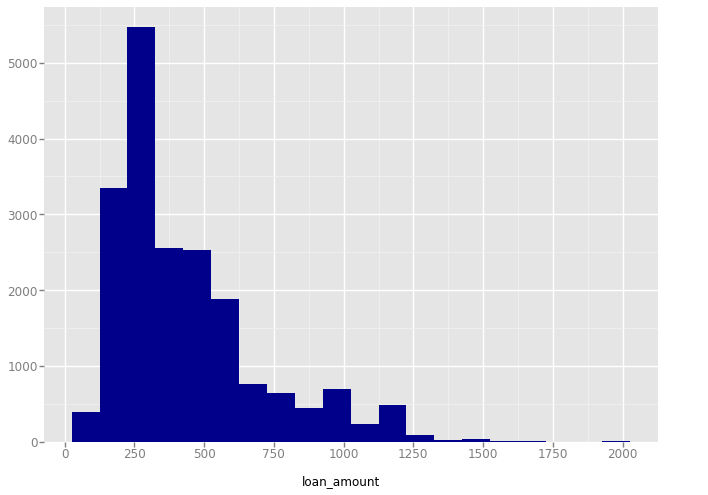

<ggplot: (293829321)>
Services


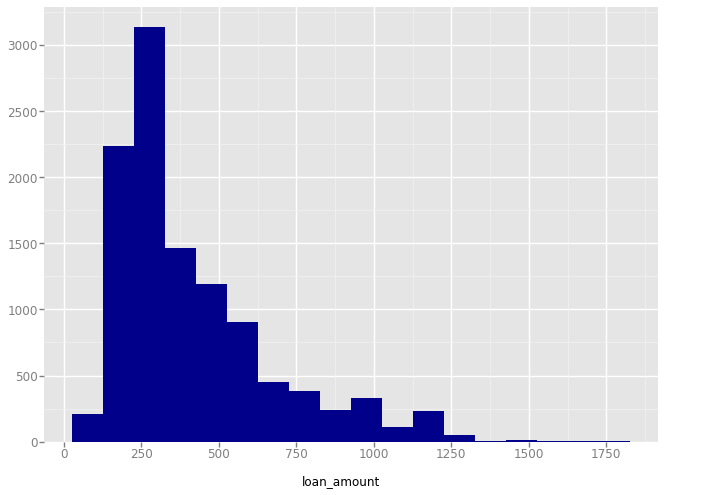

<ggplot: (293837385)>
Transportation


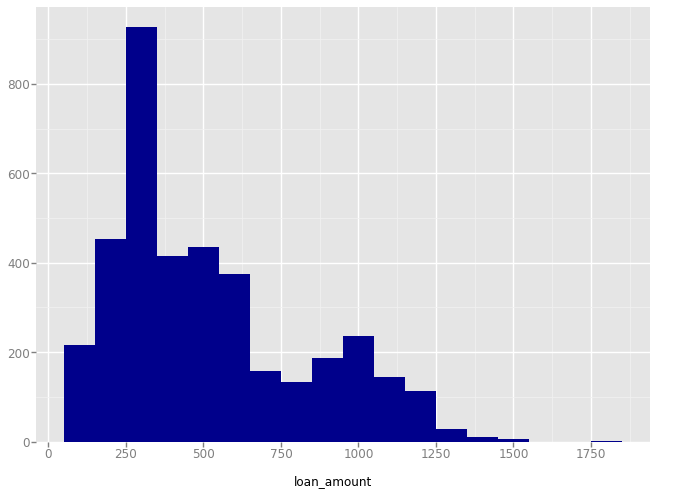

<ggplot: (293777757)>
Wholesale


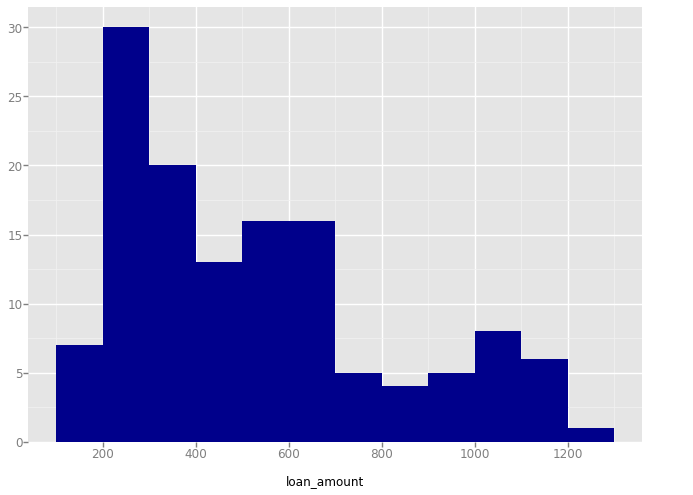

<ggplot: (290599713)>


In [11]:
## First by sector

loop_hists('sector')

In [27]:
# How do the observation counts vary for status Expired v. Overall?

len(loans_details.query("status == 'expired'"))
len(loans_details.index)

4683

127900

expired


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


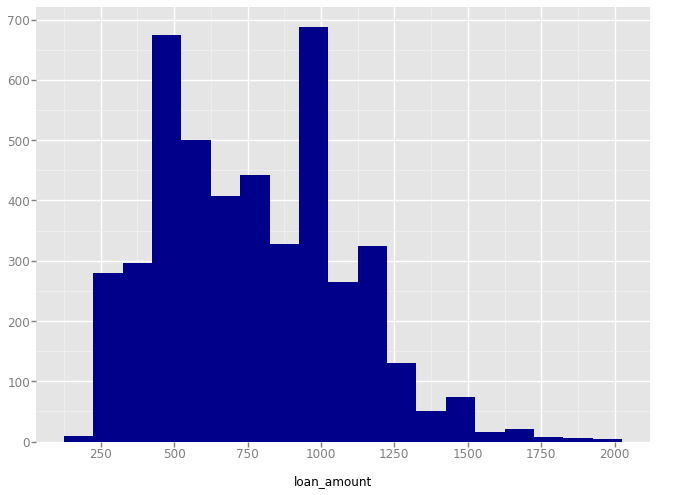

<ggplot: (309896425)>
funded


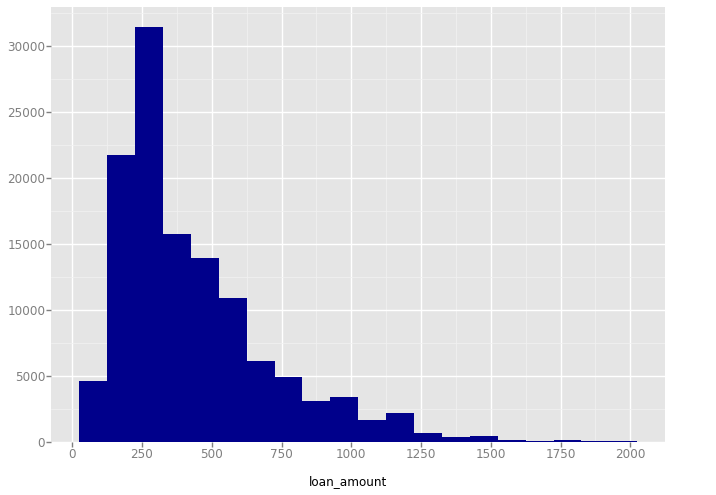

<ggplot: (294236449)>
fundraising


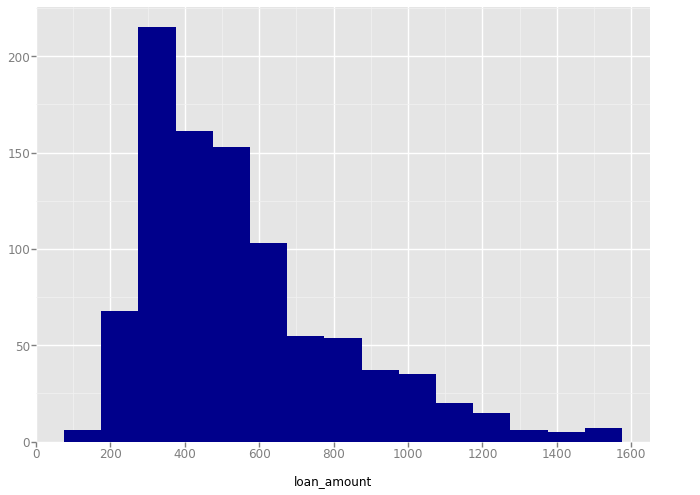

<ggplot: (309024909)>


In [61]:
# Now let's loop by status

loop_hists('status')

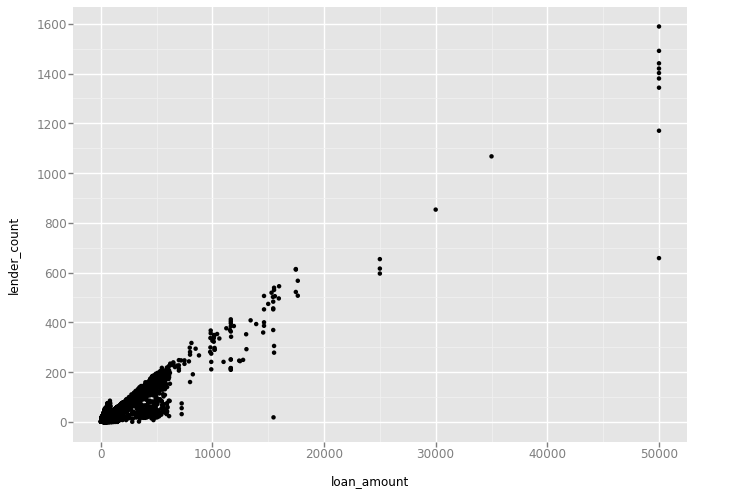

<ggplot: (309799409)>

In [40]:
ggplot(loans_full, aes(x='loan_amount', y = 'lender_count')) + \
    geom_point() 

##Hugely skewed by a few big loans

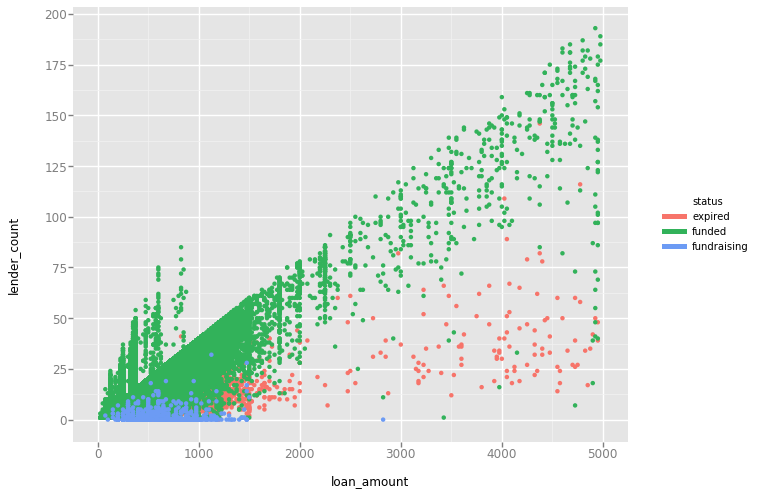

<ggplot: (302499741)>

In [39]:
# Let's try zooming in to <$5000 loans

ggplot(loans_full.query("loan_amount < 5000"), aes(x='loan_amount', y = 'lender_count', color='status')) + \
    geom_point() 

# Expired loans tend to be bigger loans with fewer lenders -- this makes sense, they didn't get enough funding
# linear relationship between loan amount and lender count -- looks like lenders tend to give in $25 increments?
# Fundraising loans tend to have fewer lenders -- this makes sense, they are still in the fundraising process

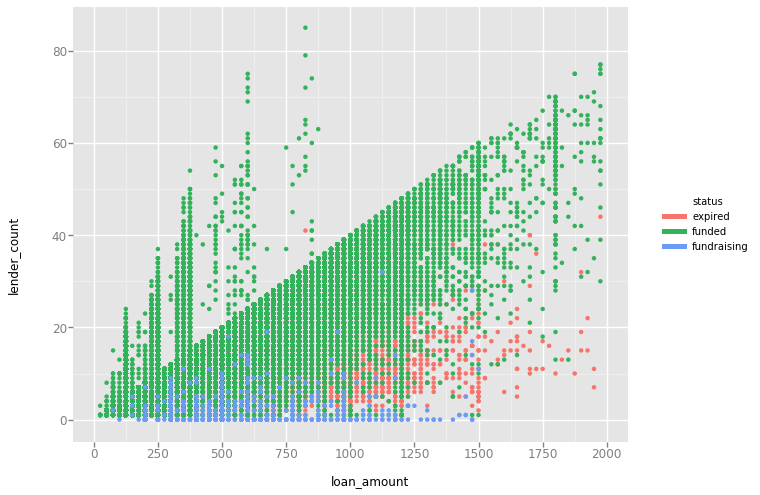

<ggplot: (303462445)>

In [41]:
#How about < $2000?

ggplot(loans_full.query("loan_amount < 2000"), aes(x='loan_amount', y = 'lender_count', color='status')) + \
    geom_point() 

    
## we can see that lenders tend to lend in $25 increments (i.e. there is a linear relationship between loan amount
## and lender count, and it is 25x)

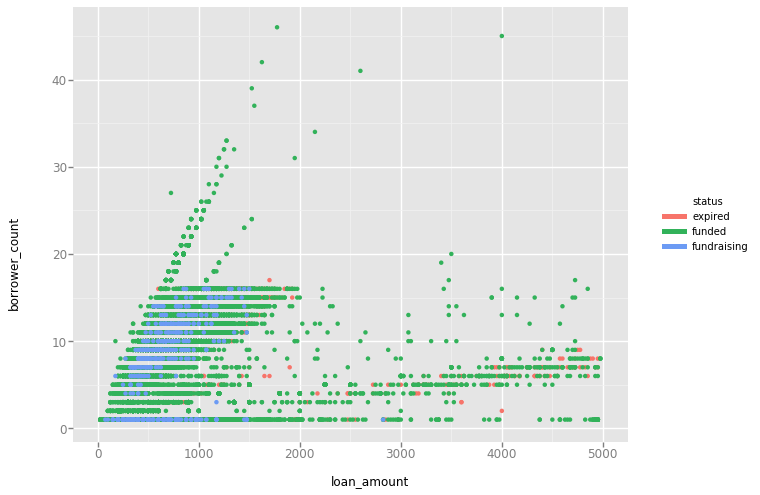

<ggplot: (308832761)>

In [63]:
ggplot(loans_full.query("loan_amount < 5000"), aes(x='loan_amount', y = 'borrower_count', color='status')) + \
    geom_point() 
    
## Expired loans tend to be bigger loans with fewer borrowers

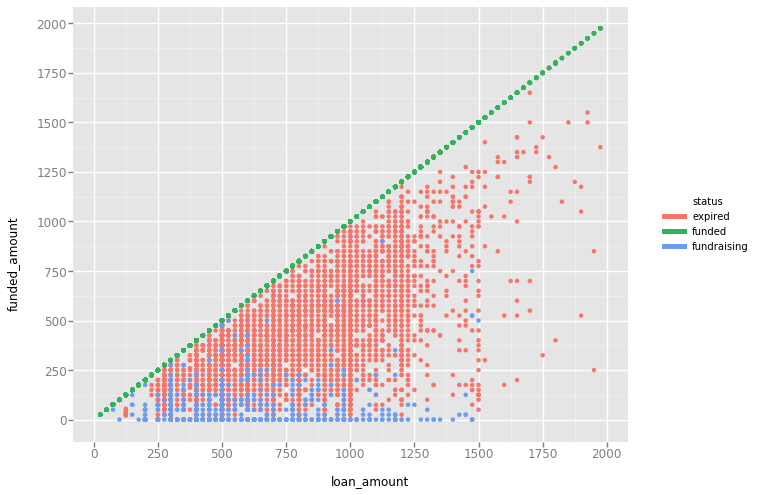

<ggplot: (304346533)>

In [64]:
ggplot(loans_full.query("loan_amount < 2000"), aes(x='loan_amount', y = 'funded_amount', color='status')) + \
    geom_point()

## Fully funded loans are where loan_amount = funded_amount. Expired loans fall below the line where slope =1

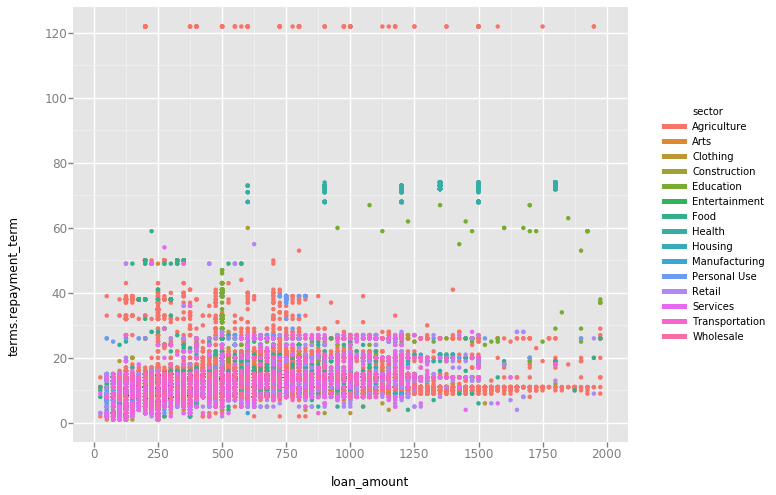

<ggplot: (335996445)>

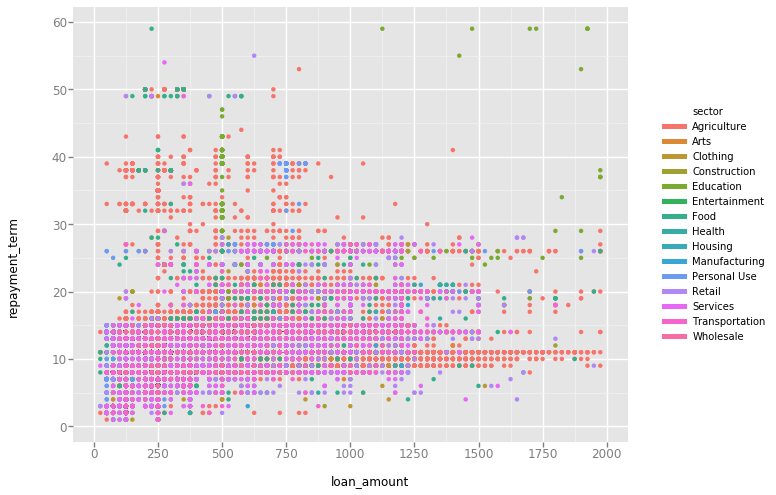

<ggplot: (360689585)>

In [73]:
## rename the terms.repayment_term field
loans_details['repayment_term'] = loans_details['terms.repayment_term']

ggplot(loans_details.query("loan_amount < 2000"), aes(x='loan_amount', y = 'terms.repayment_term', color='sector')) + \
    geom_point()

ggplot(loans_details.query("loan_amount < 2000 and repayment_term <60"), aes(x='loan_amount', y = 'repayment_term', color='sector')) + \
geom_point()

## Longer repayment terms are Agriculture (120 days). Health tends to be ~70 and Education ~60. 

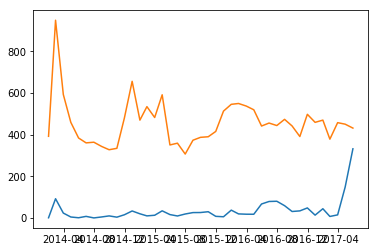

In [58]:
loans_details['posted_date_cln'] = loans_details.posted_date.str[:10]
loans_details['posted_date_cln'] = pd.to_datetime(loans_details['posted_date_cln'], infer_datetime_format=True)
loans_details = loans_details.set_index('posted_date_cln')
loans_details['diff_to_full'] = loans_details['loan_amount'] - loans_details['funded_amount']
loans_monthly = loans_details.resample('M').mean()
plt.plot(loans_monthly.query("posted_date_cln > '2014'")['diff_to_full'])
plt.plot(loans_monthly.query("posted_date_cln > '2014'")['terms.loan_amount'])

#loans_monthly['posted_date'] = loans_monthly[test.columns[0]]
#loans_monthly.head()

#ggplot(loans_monthly.query("posted_date > '2014'"), aes(x='posted_date', y='diff_to_full')) + \
#    geom_line()

In [ ]:
df

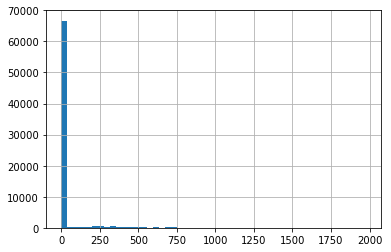

In [310]:
df.query("post_date_cln > '2014' and diff_to_full < 2000")['diff_to_full'].hist(bins = 50)

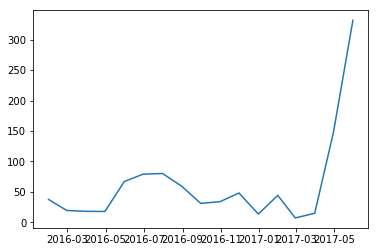

In [128]:
plt.plot(test.query("posted_date_cln > '2016'")['diff_to_full'])

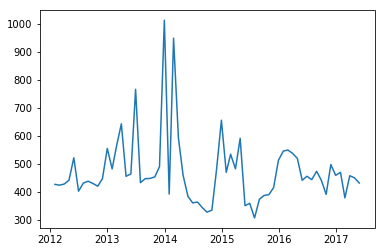

In [134]:
plt.plot(test.query("posted_date_cln > '2012'")['loan_amount'])

In [74]:
loans_details.groupby('location.town')['loan_amount'].mean()

location.town
: Akites, Chakol Division, Teso District     150.000000
: Osajai, Amagoro,Teso District              125.000000
AA                                           300.000000
AA Estate, Nairobi                           716.666667
AHERO                                        583.333333
AWASI                                        570.000000
Adongosi, Teso                               150.000000
Adumai, Moding Division, Teso District –     300.000000
Akiliamet-Teso District                      150.000000
Aldina, Jomvu                                300.000000
Aldina,Jomvu                                 200.000000
Aldina,Jomvu Kenya                           150.000000
Amagoro, Teso District                        62.500000
Amagoro,Teso District                        450.000000
Angawa avenue Kisumu City                    600.000000
Angurai – Teso - Kenya                       187.500000
Angurai, Teso District                       242.592593
Arosho;Migori                     

In [32]:
loans_full['posted_date_cln'] = loans_full.posted_date.str[:10]
loans_full['posted_date_cln'] = pd.to_datetime(loans_full['posted_date_cln'], infer_datetime_format=True)
loans_full = loans_full.set_index('posted_date_cln')

In [30]:
loans_full['posted_date_str'] = loans_full.posted_date.str[:10]
loans_daily_mean = loans_full.groupby('posted_date_str')['loan_amount'].mean()
loans_daily_mean.head()

posted_date_str
2006-04-19    225.0
2006-05-05    250.0
2006-05-07    325.0
2006-05-15    585.0
2006-05-17    377.5
Name: loan_amount, dtype: float64

,Unnamed: 0,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,funded_amount,id,image.id,image.template_id,lender_count,loan_amount,partner_id,video.id,video.thumbnailImageId
posted_date_cln,,,,,,,,,,,,,,
2006-04-30,127897.0,NaN,0.0,1.0,NaN,225.000000,342.200000,503.200000,1.0,1.800000,225.000000,6.000000,NaN,NaN
2006-05-31,127882.5,NaN,0.0,1.0,NaN,391.666667,384.041667,553.291667,1.0,5.666667,391.666667,6.000000,NaN,NaN
2006-06-30,127845.0,NaN,0.0,1.0,NaN,430.392157,414.450980,586.764706,1.0,5.450980,430.392157,6.000000,NaN,NaN
2006-07-31,127804.0,NaN,0.0,1.0,NaN,374.193548,588.741935,811.903226,1.0,6.161290,374.193548,6.000000,NaN,NaN
2006-08-31,127766.5,NaN,0.0,1.0,NaN,310.227273,706.681818,965.545455,1.0,4.931818,310.227273,6.000000,NaN,NaN
2006-09-30,127730.5,NaN,0.0,1.0,NaN,435.714286,831.071429,27019.785714,1.0,6.607143,435.714286,6.000000,NaN,NaN
2006-10-31,127703.0,NaN,0.0,1.0,NaN,330.555556,989.592593,54990.481481,1.0,5.037037,330.555556,6.000000,NaN,NaN
2006-11-30,127626.0,NaN,0.0,1.0,NaN,701.181102,1741.850394,675482.251969,1.0,18.968504,701.181102,12.393701,NaN,NaN
2006-12-31,127475.5,NaN,0.0,1.0,NaN,615.373563,2636.655172,610921.959770,1.0,12.137931,615.373563,12.925287,NaN,NaN


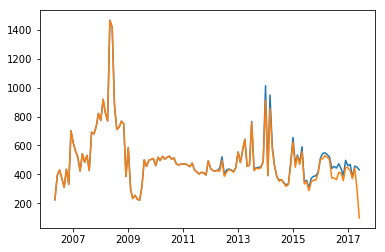

In [59]:
test = loans_full.resample('M').mean()
test.head(15)
plt.plot(test['loan_amount'])
plt.plot(test['funded_amount'])

In [139]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

In [140]:
loans_array =loans_details.query("loan_amount < 2000")[['terms.repayment_term','loan_amount']].as_matrix()

In [141]:
loans_array[1,]

array([ 14, 500])

In [142]:
type(loans_array[1,1])
loans_array = loans_array.astype(float)
type(loans_array[1,1])

numpy.int64

numpy.float64

In [143]:
centroids,_ = kmeans(loans_array,2)
idx,_ = vq(loans_array,centroids)

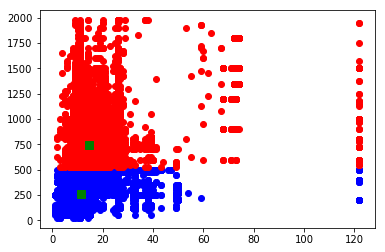

In [144]:
plot(loans_array[idx==0,0],loans_array[idx==0,1],'ob',
     loans_array[idx==1,0],loans_array[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

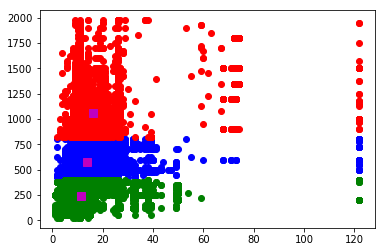

In [145]:
# now with K = 3 (3 clusters)
centroids,_ = kmeans(loans_array,3)
idx,_ = vq(loans_array,centroids)

plot(loans_array[idx==0,0],loans_array[idx==0,1],'ob',
     loans_array[idx==1,0],loans_array[idx==1,1],'or',
     loans_array[idx==2,0],loans_array[idx==2,1],'og') # third cluster points
plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
show()

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

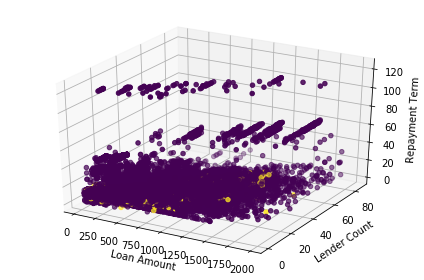

In [148]:
ld_lt2000 = loans_details.query("loan_amount < 2000")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Lender Count')
ax.set_zlabel('Repayment Term')
ax.scatter(ld_lt2000['loan_amount'],ld_lt2000['lender_count'],ld_lt2000['terms.repayment_term'], c = ld_lt2000['bonus_credit_eligibility'])
plt.tight_layout()


In [60]:
df = loans_details.merge(loans_full[['id', 'borrower_count']], left_on='id', right_on='id')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

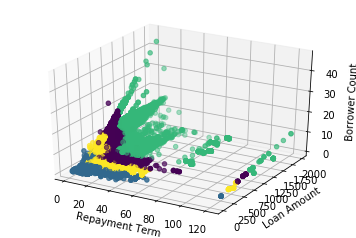

In [63]:
loan_array = df.query("loan_amount < 2000")[['loan_amount','borrower_count','terms.repayment_term']].as_matrix()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Repayment Term')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Borrower Count')


model = KMeans(n_clusters=4)
model.fit(loan_array)
labels = model.labels_
ax.scatter(loan_array[:, 2], loan_array[:, 0], loan_array[:, 1], c=labels.astype(np.float))

In [65]:
from datetime import datetime
df = df.rename(columns={'terms.disbursal_date': 'disbursal_date'})
df['exp_date_cln'] = pd.to_datetime(df.planned_expiration_date.str[:10], infer_datetime_format=True)
df['post_date_cln'] = pd.to_datetime(df.posted_date.str[:10], infer_datetime_format=True)
df['disb_date_cln'] = pd.to_datetime(df.disbursal_date.str[:10], infer_datetime_format=True)
df['time_to_fund'] =df['exp_date_cln'] - df['post_date_cln']
df['days_to_fund'] = df.time_to_fund.dt.days
df['time_to_disb'] =df['disb_date_cln'] - df['post_date_cln']
df['days_to_disb'] = df.time_to_disb.dt.days


In [232]:
df.head()

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,diff_to_full,borrower_count,exp_date_cln,post_date_cln,time_to_fund,time_to_fund2,days_to_fund,disb_date_cln,time_to_disb,days_to_disb
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,30 days,0 30\n1 30\n2 30\n3...,30.0,2017-04-03,-36 days,-36.0
1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,30 days,0 30\n1 30\n2 30\n3...,30.0,2017-04-03,-36 days,-36.0
2,2,Home Energy,0.0,False,"[{'first_name': 'Rose', 'last_name': '', 'gend...",NaN,['en'],"Hello Kiva Community! <br /><br />Meet Rose, w...",NaN,NaN,NaN,50,NaN,1291530,2515991,1,0,0,2,75,Kenya,KE,town,0.516667 35.283333,point,Eldoret,Rose,156.0,[],2017-06-08T00:30:03Z,2017-05-09T00:30:04Z,Personal Use,fundraising,"[{'name': '#Eco-friendly'}, {'name': '#Technol...",6000.0,KES,2017-04-28T07:00:00Z,75,"[{'due_date': '2017-05-14T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...","['Green', 'Earth Day Campaign']",Julie Keaton,892591.0,to buy a solar lantern.,NaN,NaN,NaN,NaN,25,1,2017-06-08,2017-05-09,30 days,0 30\n1 30\n2 30\n3...,30.0,2017-04-28,-11 days,-11.0
3,3,Used Clothing,0.0,False,"[{'first_name': 'Jane', 'last_name': '', 'gend...",NaN,['en'],"Jane was born in the 1980, and she is happily ...",NaN,NaN,NaN,0,NaN,1291525,2515986,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Jane,386.0,[],2017-06-08T00:20:04Z,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-08T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,30 days,0 30\n1 30\n2 30\n3...,30.0,2017-04-03,-36 days,-36.0
4,4,Farming,0.0,False,"[{'first_name': 'Alice', 'last_name': '', 'gen...",NaN,['en'],Alice (the woman pictured above in her small s

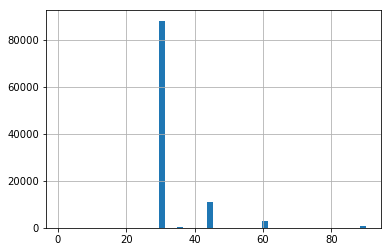

In [66]:
df.query('days_to_fund < 1000')['days_to_fund'].hist(bins = 50)

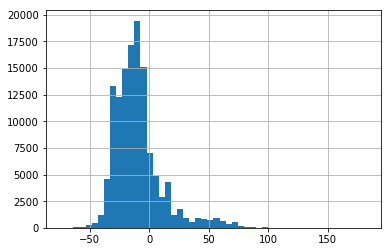

In [67]:
df.query('days_to_disb > -200')['days_to_disb'].hist(bins = 50)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

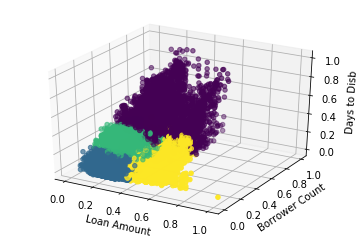

In [68]:
from sklearn import preprocessing

loan_array = df.query("loan_amount < 2000 and days_to_disb > -200 and days_to_fund < 1000")[['loan_amount','lender_count','days_to_disb']].as_matrix()
min_max_scaler = preprocessing.MinMaxScaler()
loan_array_minmax = min_max_scaler.fit_transform(loan_array)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Borrower Count')
ax.set_zlabel('Days to Disb')


model = KMeans(n_clusters=4)
model.fit(loan_array_minmax)
labels = model.labels_
ax.scatter(loan_array_minmax[:, 2], loan_array_minmax[:, 0], loan_array_minmax[:, 1], c=labels.astype(np.float))



In [270]:
from math import log
# loan_array = df.query("loan_amount < 2000 and days_to_disb > -200 and days_to_fund < 1000")[['loan_amount','days_to_fund','days_to_disb']].as_matrix()
df['loan_amount_log'] = np.log(df.loan_amount) 
df['days_to_fund_log'] = np.log(df.days_to_fund)
df['days_to_disb_log'] = np.log(df.days_to_disb + 100)
df.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,diff_to_full,borrower_count,exp_date_cln,post_date_cln,disb_date_cln,time_to_fund,days_to_fund,time_to_disb,days_to_disb,loan_amount_log,days_to_fund_log,days_to_disb_log
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,2017-04-03,30 days,30.0,-36 days,-36.0,6.214608,3.401197,4.158883
1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,2017-04-03,30 days,30.0,-36 days,-36.0,6.214608,3.401197,4.158883
2,2,Home Energy,0.0,False,"[{'first_name': 'Rose', 'last_name': '', 'gend...",NaN,['en'],"Hello Kiva Community! <br /><br />Meet Rose, w...",NaN,NaN,NaN,50,NaN,1291530,2515991,1,0,0,2,75,Kenya,KE,town,0.516667 35.283333,point,Eldoret,Rose,156.0,[],2017-06-08T00:30:03Z,2017-05-09T00:30:04Z,Personal Use,fundraising,"[{'name': '#Eco-friendly'}, {'name': '#Technol...",6000.0,KES,2017-04-28T07:00:00Z,75,"[{'due_date': '2017-05-14T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...","['Green', 'Earth Day Campaign']",Julie Keaton,892591.0,to buy a solar lantern.,NaN,NaN,NaN,NaN,25,1,2017-06-08,2017-05-09,2017-04-28,30 days,30.0,-11 days,-11.0,4.317488,3.401197,4.488636
3,3,Used Clothing,0.0,False,"[{'first_name': 'Jane', 'last_name': '', 'gend...",NaN,['en'],"Jane was born in the 1980, and she is happily ...",NaN,NaN,NaN,0,NaN,1291525,2515986,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Jane,386.0,[],2017-06-08T00:20:04Z,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-08T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN,500,1,2017-06-08,2017-05-09,2017-04-03,30 days,30.0,-36 days,-36.0,6.214608,3.401197,4.158883
4,4,Farming,0.0,False,"[{'first_name': 'Alice', 'last_name': '', 'gen...",NaN,[

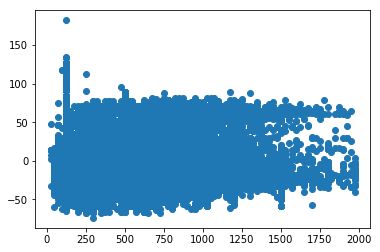

In [304]:
plt.scatter(x = df.query("loan_amount < 2000 and days_to_disb > -200")['loan_amount'], y = df.query("loan_amount < 2000 and days_to_disb > -200")['days_to_disb'])